# Matplotlib test

In [9]:
# Importar matplotlib
import matplotlib.pyplot as plt

# Importar modulos básicos
import pandas as pd
import numpy as np

In [10]:
# Importar datos
datos = pd.read_csv('../../Datasets/PIB per capita largo (dólares de 2010).csv')

# Utilizar datos de España
españa = datos[datos['country'] == 'Spain']
españa.head(5)

,country,year,value
28,Spain,1960,6220
115,Spain,1961,6890
206,Spain,1962,7500
297,Spain,1963,8150
388,Spain,1964,8500


# Partes de una imagen en matplotlib.pyplot

![Figure and axes](../../img/matplolib_figure_and_axes.png "Figure and axes")
![Figure anatomy](../../img/matplotlib_figure_anatomy.png 'Figure anatomy')

## Formas de crear gráficos

Matplotlib cuenta con dos métodos para crear los gráficos. La sintaxis concreta dependerá de que se use uno u otro.

- **Método explícito, orientado a objetos**: algo más lento de escribir, pero aporta más control y replica el comportamiento de otros objetos de Matplotlib. Recomendado para visualizaciones más complejas o detalladas.

Algunos objetos de Matplotlib son los siguientes:

- Figure
- Artist
- Axes
- Axis
- Text
- Polygon

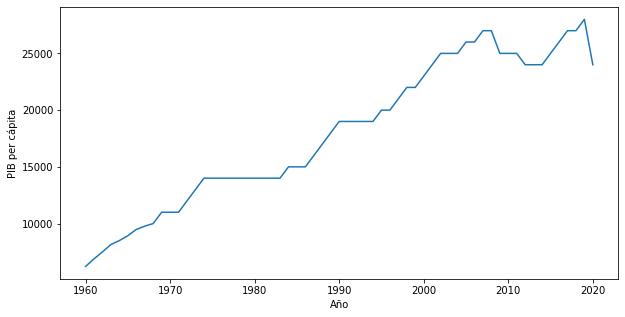

In [4]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(españa['year'], españa['value'])
ax.set_xlabel('Año')
ax.set_ylabel('PIB per cápita');

- **Método implícito de Pyplot**: más rápido y compacto. Recomendado para plots simples.

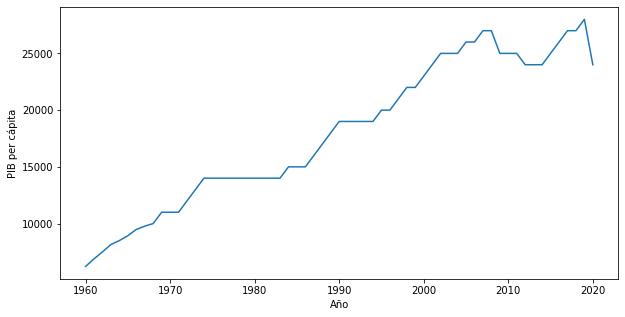

In [5]:
plt.figure(figsize = (10, 5))
plt.plot(españa['year'], españa['value'])
plt.xlabel('Año')
plt.ylabel('PIB per cápita');

# Personalizando los gráficos

## Básicos

Matplotlib ofrece multitud de argumentos para personalizar el gráfico que deben pasarse como kwargs al crear el gráfico. Cada gráfico tiene su lista de argumentos particular, aunque muchos se comparten.

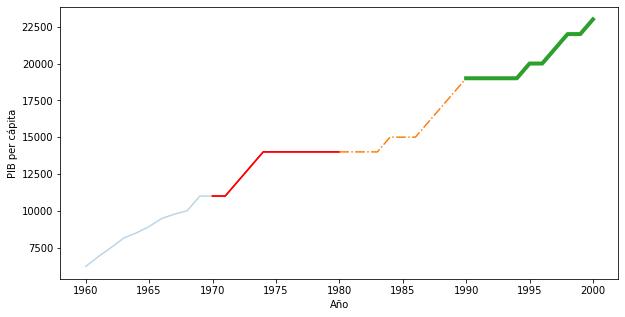

In [17]:
plt.figure(figsize = (10, 5))

# Añade transparencia
plt.plot('year', 'value', data = españa[españa['year'].between(1960, 1970)], alpha = 0.3)

# Cambia el color a rojo
plt.plot('year', 'value', data = españa[españa['year'].between(1970, 1980)], color = 'red')
# Utiliza un código de color hexadecimal
plt.plot('year', 'value', data = españa[españa['year'].between(1970, 1980)], color = '#FF0000') # Color rojo

# Cambia el tipo de línea
plt.plot('year', 'value', data = españa[españa['year'].between(1980, 1990)], linestyle = '-.')

# Cambia el grosor de la línea
plt.plot('year', 'value', data = españa[españa['year'].between(1990, 2000)], linewidth = 4)

plt.xlabel('Año')
plt.ylabel('PIB per cápita');

### Limitar el rango del gráfico

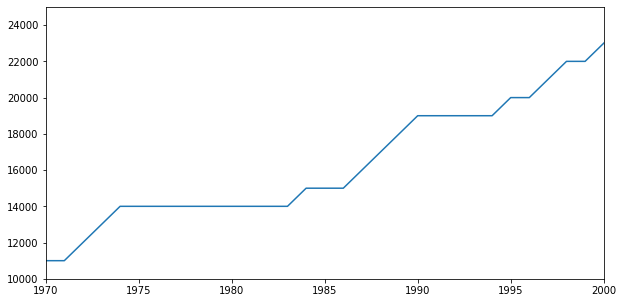

In [18]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot('year', 'value', data = españa)

# Límite horizontal
ax.set_xlim(1970, 2000)

# Límite vertical
ax.set_ylim(10000, 25000);

# Fijar ambos límites a la vez
# ax.set(xlim = [1970, 2000], ylim = [10000, 25000]);

### Modificar los ticks

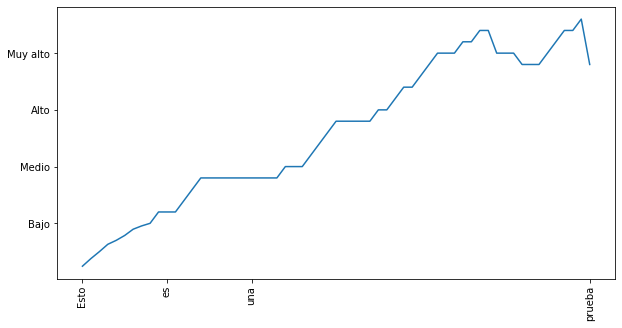

In [8]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot('year', 'value', data = españa)

# Cambiar los ticks horizontales
# Es un objeto Text
ax.set_xticks(
    [1960, 1970, 1980, 2020], # Posición en la que iría el texto
    ['Esto', 'es', 'una', 'prueba'],
    # Otros argumentos de los objetos Text
    rotation = 90)

# Ticks verticales
ax.set_yticks(
    [10000, 15000, 20000, 25000],
    ['Bajo', 'Medio', 'Alto', 'Muy alto']);

# Ocultar los ticks
# ax.get_xaxis().set_visible(False)
# ax.get_yaxis().set_visible(False)

### Añadir títulos y leyendas

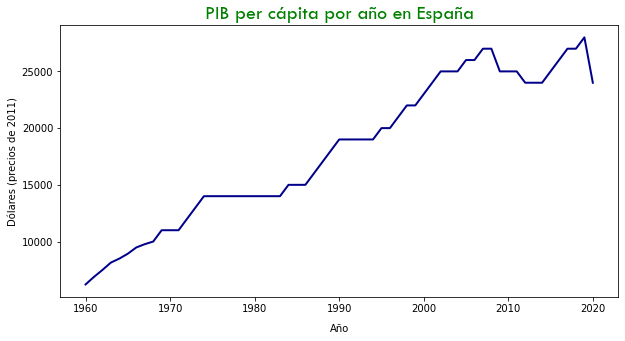

In [88]:
fig, ax = plt.subplots(figsize = (10, 5))
line, = ax.plot('year', 'value', data = españa, color = 'darkblue', linewidth = 2)

# Título general
ax.set_title('PIB per cápita por año en España',
    # Consultar enlace «Argumentos para texto en Matplotlib»
    fontsize = 20, # Tamaño de la letra
    fontfamily = 'Tw Cen MT', # Tipo de letra
    color = 'green')

# Título en el eje horizontal
ax.set_xlabel(
    'Año', 
    labelpad = 10, # Separación del título con el eje
)

# Título en el eje horizontal vertical
ax.set_ylabel(
    'Dólares (precios de 2011)');

## Añadir y modificar otros elementos


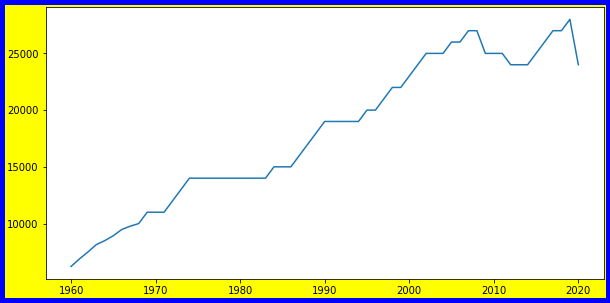

In [85]:
# Modificar el fondo del gráfico
fig, ax = plt.subplots(
    figsize = (10, 5), 
    facecolor = 'yellow',
    edgecolor = 'blue', # Borde de la imagen
    linewidth = 10 # Grosor del borde
    ) 
ax.plot('year', 'value', data = españa);

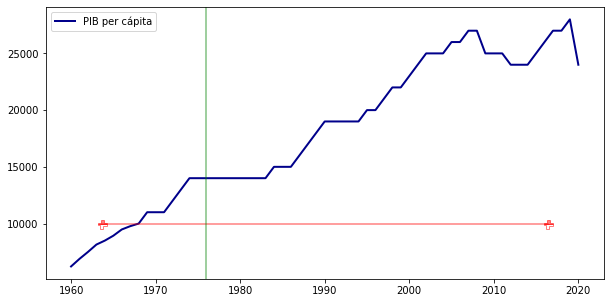

In [11]:
fig, ax = plt.subplots(figsize = (10, 5))
line, = ax.plot('year', 'value', data = españa, color = 'darkblue', linewidth = 2)

line.set_label('PIB per cápita') # Prepara el texto de la leyenda
ax.legend() # Añade la leyenda

# Añade una línea horizontal
ax.axhline(10000, 
    color = 'red', 
    linestyle = '-', 
    alpha = 0.5, 
    xmin = 0.1, # Punto de inicio como proporción del gráfico
    xmax = 0.9, # Punto final como proporción del gráfico
    marker = 'P', # Marcador para el borde de la línea
    markersize = 9, # Tamaño del marcador
    fillstyle = 'top' # Relleno del marcador
    )

# Añade una línea vertical
ax.axvline(1976, color = 'green', alpha = 0.5);

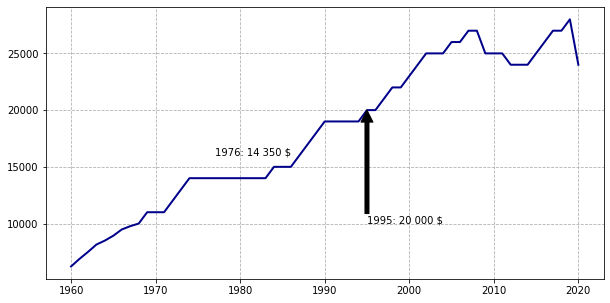

In [12]:
fig, ax = plt.subplots(figsize = (10, 5))
line, = ax.plot('year', 'value', data = españa, color = 'darkblue', linewidth = 2)

# Añade texto al gráfico
ax.text(1977, 16000, '1976: 14 350 $')

# Anotación con flecha
ax.annotate(
    '1995: 20 000 $', 
    xy = (1995, 20000), # ¿A dónde apunta la flecha?
    arrowprops = {'facecolor' : 'black'}, # Características de la flecha 
    xytext = (1995, 10000), xycoords = 'data' # ¿Dónde se coloca el texto?
    )

# Añade una rejilla
ax.grid(True, linestyle = '--')

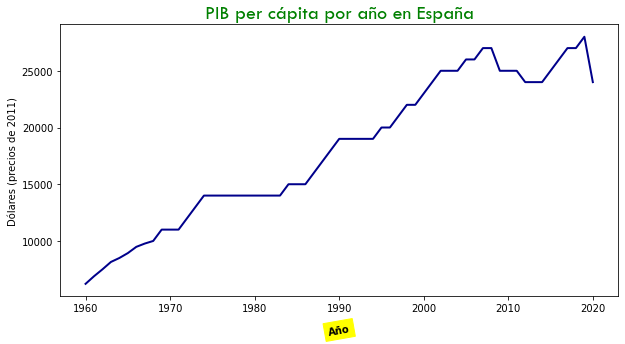

In [11]:
fig, ax = plt.subplots(figsize = (10, 5))
line, = ax.plot('year', 'value', data = españa, color = 'darkblue', linewidth = 2)

# Título general
ax.set_title('PIB per cápita por año en España',
    # Consultar enlace «Argumentos para texto en Matplotlib»
    fontsize = 20, # Tamaño de la letra
    fontfamily = 'Tw Cen MT', # Tipo de letra
    color = 'green')

# Título en el eje horizontal
ax.set_xlabel(
    'Año', 
    rotation = 10, # Giro del eje
    labelpad = 10, # Separación del título con el eje
    fontweight = 'bold', 
    backgroundcolor = 'yellow'
)

# Título en el eje horizontal vertical
ax.set_ylabel(
    'Dólares (precios de 2011)');

In [ ]:
# Guardar imagen
fig.savefig(
    'imagen_de_ejemplo.png', 
    transparent = True # Usar fondo transparente
    )

# Gráficos básicos en Matplotlib

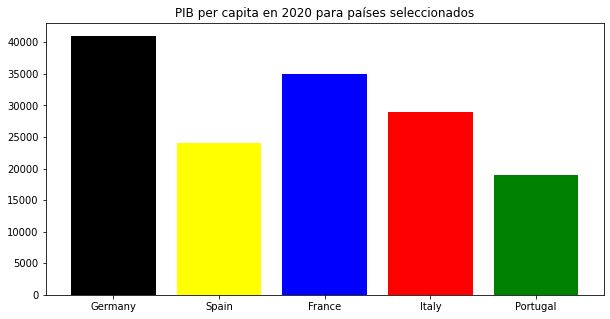

In [3]:
# Gráfico de barras
fig, ax = plt.subplots(figsize = (10, 5))

# Seleccionar países
paises = ['Spain', 'Portugal', 'France', 'Germany', 'Italy']
seleccion = datos[(datos['year'] == 2020) & (datos['country'].isin(paises))]

colores = ['black', 'yellow', 'blue', 'red', 'green']

# Crear gráfico
ax.bar('country', 'value', data = seleccion, color = colores)
ax.set_title('PIB per capita en 2020 para países seleccionados');

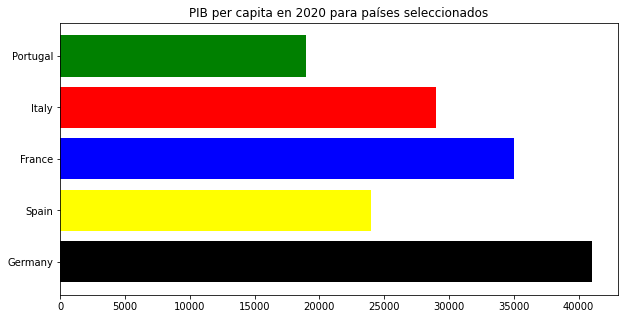

In [4]:
# Gráfico de barras horizontal
# Útil cuando hay muchas etiquetas y largas
fig, ax = plt.subplots(figsize = (10, 5))

ax.barh('country', 'value', data = seleccion, color = colores)
ax.set_title('PIB per capita en 2020 para países seleccionados');

### Interpretación de un boxplot

![Interpretación de un boxplot](../../img/Interpretación_boxplot.png "Figure and axes")

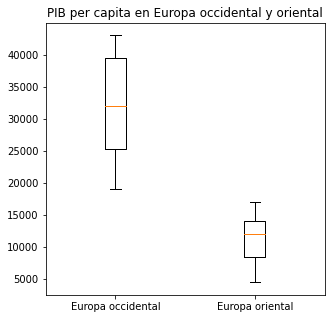

In [25]:
# Boxplot
# Elegir países
europa_occidental = ['Spain', 'Portugal', 'France', 'Germany', 'Italy', 'United Kingdom']
europa_oriental = ['Greece', 'Romania', 'Bulgaria', 'Poland', 'Hungary', 'Slovakia', 'Albania']

# Extraer información para esos países
pib_occidental = datos[(datos['year'] == 2020) & (datos['country'].isin(europa_occidental))]['value'].values
pib_oriental = datos[(datos['year'] == 2020) & (datos['country'].isin(europa_oriental))]['value'].values

# Incluir ambas listas de información en una sola lista
# El boxplot exige que estén en una sola lista (lista de listas)
pib_europa = [pib_occidental, pib_oriental]

# Crea el boxplot
fig, ax = plt.subplots(figsize = (5, 5))
ax.boxplot(pib_europa)
ax.set_title('PIB per capita en Europa occidental y oriental')
ax.set_xticklabels(['Europa occidental', 'Europa oriental']);

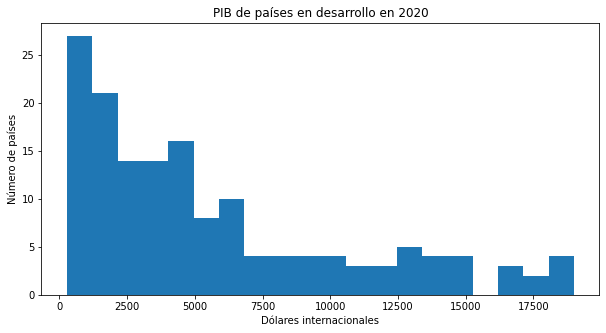

In [48]:
# Histograma
# Obtener datos para todos los países en 2020
datos_2020 = datos[datos['year'] == 2020]
pib_2020 = datos_2020['value']

# Seleccionar países con un PIB per cápita de menos de 20 000 dólares
pib_2020_seleccion = list(filter(lambda x: x < 20000, pib_2020))

# Crear el histograma
fig, ax = plt.subplots(figsize = (10, 5))
ax.hist(pib_2020_seleccion, bins = 20)
ax.set_title('PIB de países en desarrollo en 2020')
ax.set_ylabel('Número de países')
ax.set_xlabel('Dólares internacionales');

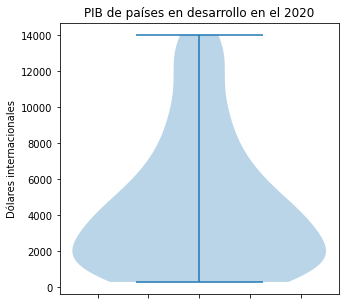

In [83]:
# Violinplot
# Datos para todos los países en desarrollo en 2020
pib_2020 = datos[(datos['year'] == 2020) & (datos['value'] < 15000)]['value']

# Crea el boxplot
fig, ax = plt.subplots(figsize = (5, 5))
ax.violinplot(pib_2020)
ax.set_title('PIB de países en desarrollo en el 2020')
ax.set_ylabel('Dólares internacionales')
ax.set(xticklabels = []);

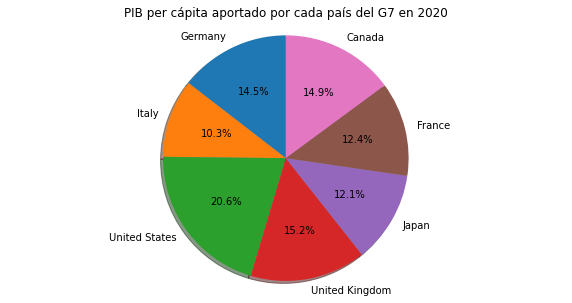

In [104]:
# Gráfico de tarta

# Datos sobre PIB en los países del G7
g7 = ['Germany', 'Italy', 'United States', 'United Kingdom', 'Japan', 'France', 'Canada']

pib_g7 = {
        pais : datos[(datos['year'] == 2020) & (datos['country'] == pais)]['value'].iloc[0] for pais in g7
}

# Crear el gráfico de tarta
# Importante: ¡utiliza el argumento 'facecolor' o el fondo será transparente!
fig, ax = plt.subplots(figsize = (10, 5), facecolor = 'white')
ax.pie(pib_g7.values(), # PIB per cápita de los países
        labels = pib_g7.keys(), # Etiquetas de los países
        autopct='%1.1f%%', # Mostrar porcentaje y en qué formato
        shadow=True, 
        startangle=90)
ax.set_title('PIB per cápita aportado por cada país del G7 en 2020')
ax.axis('equal');

### Gráficos extras

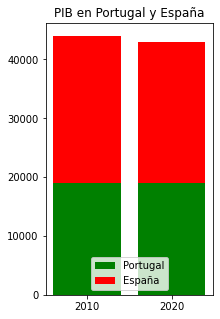

In [51]:
# Gráfico apilado
fig, ax = plt.subplots(figsize = (3, 5))

etiquetas = ['2010', '2020']
españa = datos[(datos['year'].isin([2010, 2020])) & (datos['country'] == 'Spain')]
portugal = datos[(datos['year'].isin([2010, 2020])) & (datos['country'] == 'Portugal')]

ax.bar(etiquetas, 'value', data = portugal, color = 'green', label = 'Portugal')
ax.bar(etiquetas, 'value', data = españa, bottom = portugal['value'], color = 'red', label = 'España')

ax.set_title('PIB en Portugal y España')
ax.legend(loc = 'lower center');

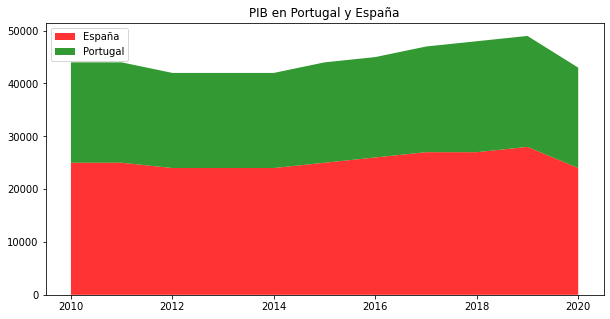

In [ ]:
# Gráfico apilado
fig, ax = plt.subplots(figsize = (10, 5))

años = [i for i in range(2010, 2021)]
valores = {
    'España' : datos[(datos['year'].between(2010, 2020)) & (datos['country'] == 'Spain')]['value'],
    'Portugal' : datos[(datos['year'].between(2010, 2020)) & (datos['country'] == 'Portugal')]['value']
}
 
ax.stackplot(años, valores.values(),
             labels= valores.keys(), 
             alpha=0.8, colors = ['red', 'green'])
ax.set_title('PIB en Portugal y España')
ax.legend(loc = 'upper left');

# Gráficos multiples en una sola imagen

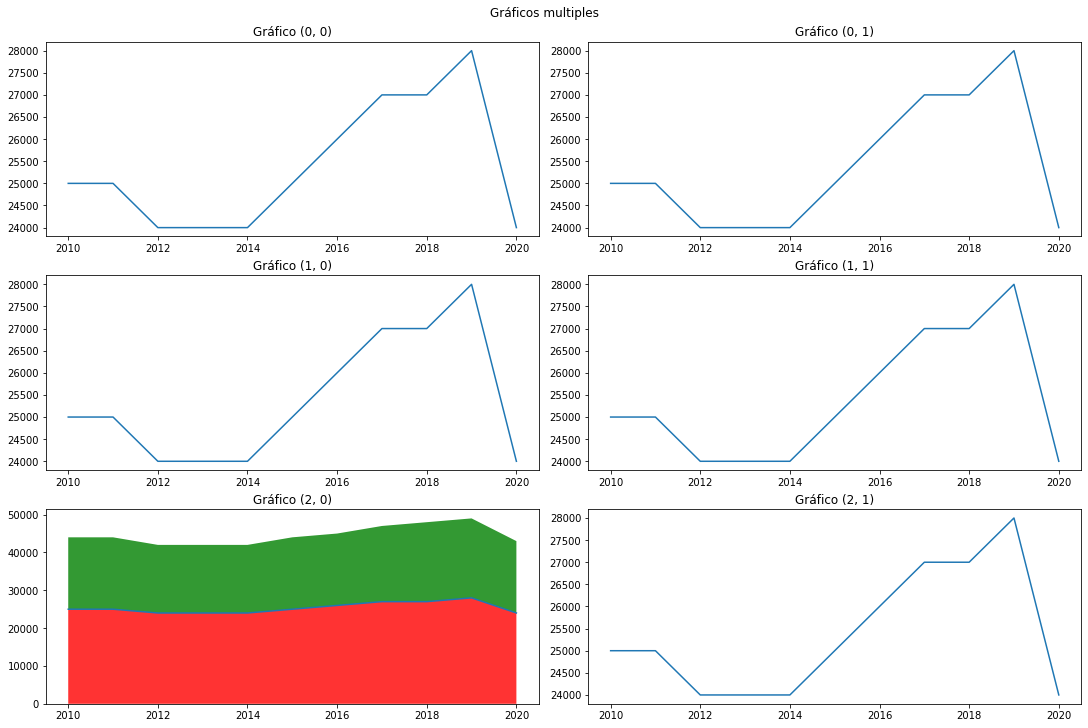

In [47]:
n_filas = 3
n_columnas = 2

# Crear los subplots
fig, axs = plt.subplots(
    n_filas, n_columnas, 
    figsize = (15, 10),
    sharex = False, sharey = False,
    layout = 'constrained' # Para evitar que se solapen las etiquetas
    )
 
for i in range(n_filas):
    for j in range(n_columnas):
        axs[i, j].plot('year', 'value', data = españa)
        axs[i, j].set_title(f'Gráfico ({i}, {j})')

# Cambiar uno de los gráficos
axs[2, 0].stackplot(años, valores.values(),
             labels= valores.keys(), 
             alpha=0.8, colors = ['red', 'green'])

# Poner un título común
fig.suptitle('Gráficos multiples');


### Mosaico con subplots

In [1]:
mosaico_simple = """
112
332
"""

fig, axs = plt.subplot_mosaic(mosaico_simple, layout = 'constrained')
fig.suptitle('Mosaico simple');

NameError: name 'plt' is not defined

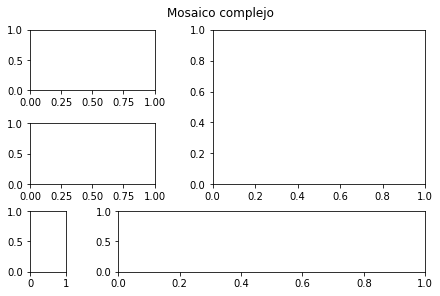

In [15]:
mosaico_complejo = """
11222
33222
45555
"""

fig, axs = plt.subplot_mosaic(mosaico_complejo, layout = 'constrained')
fig.suptitle('Mosaico complejo');

# Extras

### Ajustes por defecto

Los rc (runtime configuration) settings son un diccionario que contiene los ajustes por defecto para la visualización de los gráficos. A diferencia de la mayoría de objetos utilizados aquí, este diccionario se debe importar del modulo matplotlib y no matplotlib.pyplot.

In [27]:
# Importar matplotlib
import matplotlib as mpl

mpl.rcParams['lines.linestyle'] = ':'

# Restaurar los parámetros por defecto
mpl.rcParams.update(mpl.rcParamsDefault)

### Estilos

Los estilos modifican los parámetros por defecto contenidos en rcParams.

[Lista completa de estilos](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh']


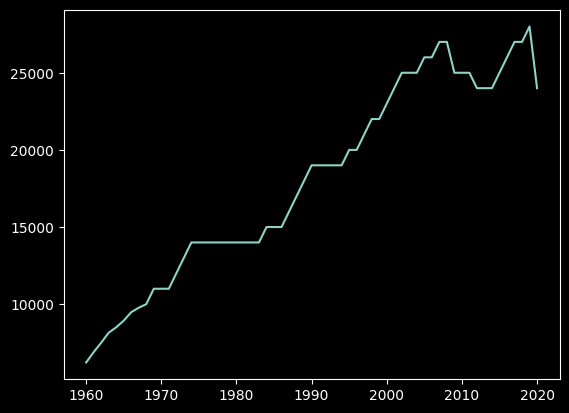

In [28]:
# Mostrar estilos disponibles
styles = plt.style.available
print(styles[:5])

# Activar un estilo
plt.style.use('dark_background')

plt.plot('year', 'value', data = españa)

# Resetear al estilo por defecto
mpl.rcParams.update(mpl.rcParamsDefault);

# Enlaces de interés

- [Programación explícita frente a implícita](https://matplotlib.org/stable/users/explain/api_interfaces.html#api-interfaces)
- [Cheatsheets para Matplotlib](https://matplotlib.org/cheatsheets/)
- [Selector de códigos hexadecimales para colores](https://htmlcolorcodes.com/es/)
- [Argumentos para texto en Matplotlib](https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text)